# Loan Eligibility Prediction Using Pipeline

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv("train.csv")

In [3]:
# Shape of Dataset
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Checking Duplicates Values
df.duplicated().sum()

0

In [6]:
# Checking Null Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Datatypes of DataFrame
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Feature Transformation

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

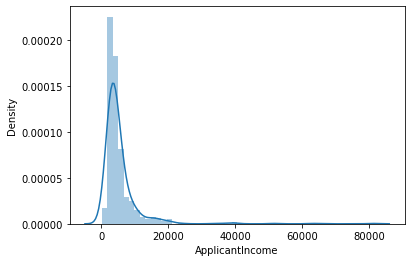

In [8]:
sns.distplot(df['ApplicantIncome'])

**This Graph is Right Skewed. we have to normalize it.**

## Feature Transformation

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

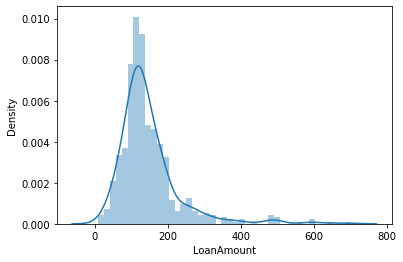

In [9]:
sns.distplot(df['LoanAmount'])

**This is also right skewed. we have to normalize this also.**

In [10]:
df['LoanAmount'] = np.log(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

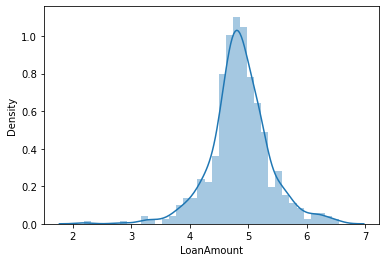

In [11]:
sns.distplot(df['LoanAmount'])

**Now, It is Normalized now.**

## Feature Construction

Making Total Income Column -> from Applicant & Coapplicant Income

In [12]:
df['TotalIncome']= df['ApplicantIncome']+df['CoapplicantIncome']

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,Y,6000.0


## Feature Selection

In [14]:
df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'],inplace=True,axis=1)

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

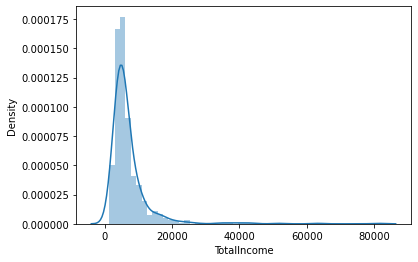

In [15]:
sns.distplot(df['TotalIncome'])

We have normalize it.

In [16]:
df['TotalIncome'] = np.log(df['TotalIncome'])

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

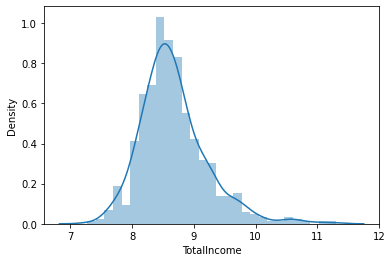

In [17]:
sns.distplot(df['TotalIncome'])

Now, it is normally distributed.

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4.852030,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,4.189655,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,4.787492,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,4.948760,360.0,1.0,Urban,Y,8.699515


In [19]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [20]:
# Importing Libraries

# One Hot Encoder 
from sklearn.preprocessing import OneHotEncoder

#SimpleImputer
from sklearn.impute import SimpleImputer

# Scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Column Transformer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

# Logistic Regression
from sklearn.linear_model import LogisticRegression

#Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

#Label Encoder
from sklearn.preprocessing import LabelEncoder

# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

#RandomForest
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import RobustScaler

In [21]:
# Test Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Loan_Status'],axis=1),df['Loan_Status'],test_size=0.2,random_state=0)

In [22]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
90,Male,Yes,0,Graduate,No,4.875197,360.0,1.0,Semiurban,8.675564
533,Male,No,1,Graduate,No,5.278115,360.0,NaN,Semiurban,9.328123
452,Male,Yes,0,Graduate,No,5.003946,360.0,0.0,Rural,8.644883
355,Female,No,NaN,Graduate,No,4.753590,180.0,1.0,Urban,8.246172
266,Male,Yes,2,Graduate,No,5.010635,360.0,1.0,Semiurban,8.715224
...,...,...,...,...,...,...,...,...,...,...
277,Male,Yes,0,Graduate,No,4.382027,360.0,1.0,Urban,8.390041
9,Male,Yes,1,Graduate,No,5.855072,360.0,1.0,Semiurban,10.077819
359,Male,Yes,3+,Graduate,No,5.298317,360.0,1.0,Semiurban,9.028099
192,Male,Yes,0,Not Graduate,No,5.075174,360.0,1.0,Urban,8.705000


## Column Transformer

In [23]:
trf1 = ColumnTransformer([
    ('Imputer_Gen_Mar_Dep_Emp_Credit',SimpleImputer(strategy='most_frequent'),[0,1,2,4]),
    ('Imputer_LoanAmount_Loan_Amount_Term_',SimpleImputer(),[5,6,7])
],remainder='passthrough')

In [24]:
trf2 = ColumnTransformer([
    ('Ordinal_Education',OrdinalEncoder(),[3])
],remainder='passthrough')

In [25]:
trf3 = ColumnTransformer([
    ('ohe_gen_mar_emp_prop',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,4,8])
],remainder='passthrough')

In [26]:
trf4 = ColumnTransformer([
    ('Scaler',StandardScaler(),slice(0,17))
])

In [27]:
trf5 = RandomForestClassifier()

In [28]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [29]:
le = LabelEncoder()
le.fit(y_train)
y_train =  le.transform(y_train)
y_test = le.transform(y_test)

In [30]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
90,Male,Yes,0,Graduate,No,4.875197,360.0,1.0,Semiurban,8.675564
533,Male,No,1,Graduate,No,5.278115,360.0,NaN,Semiurban,9.328123
452,Male,Yes,0,Graduate,No,5.003946,360.0,0.0,Rural,8.644883
355,Female,No,NaN,Graduate,No,4.753590,180.0,1.0,Urban,8.246172
266,Male,Yes,2,Graduate,No,5.010635,360.0,1.0,Semiurban,8.715224
...,...,...,...,...,...,...,...,...,...,...
277,Male,Yes,0,Graduate,No,4.382027,360.0,1.0,Urban,8.390041
9,Male,Yes,1,Graduate,No,5.855072,360.0,1.0,Semiurban,10.077819
359,Male,Yes,3+,Graduate,No,5.298317,360.0,1.0,Semiurban,9.028099
192,Male,Yes,0,Not Graduate,No,5.075174,360.0,1.0,Urban,8.705000


In [31]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Imputer_Gen_Mar_Dep_Emp_Credit',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 4]),
                                                 ('Imputer_LoanAmount_Loan_Amount_Term_',
                                                  SimpleImputer(),
                                                  [5, 6, 7])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_gen_mar_emp_prop',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2, 4, 8])])),
                ('trf4',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  slice(0, 17, None))])),
                ('trf5', RandomForestClassifier())])

In [32]:
y_pred = pipe.predict(X_test)

In [33]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [34]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7317073170731707

In [36]:
from sklearn.model_selection import GridSearchCV
params ={
    'trf5__max_depth' : [1,2,3,4,5,None]}
grid = GridSearchCV(pipe,params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'trf5__max_depth': 1}

In [37]:
grid.best_score_

0.6761698618841476

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 1, 32],
       [ 1, 89]], dtype=int64)

<AxesSubplot:>

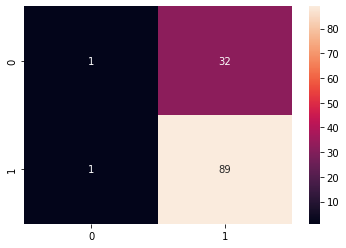

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

**The Accuracy of the Model is 73% using RandomForestClassifier.<br>
The Accuracy can be improved if we provide more Trainiing data.**